In [6]:
# !python3 -m pip install --upgrade 'google-cloud-bigquery[bqstorage,pandas]'

In [41]:
#  Standard library imports
from collections import Counter
#  Companion scripts 
from client_auth import create_client
# #  BigQuery import
# from google.oauth2 import service_account
# from google.cloud import bigquery
#  Data processing
import pandas as pd
pd.set_option("display.max_columns", None) 
#  Data vizualization
from matplotlib import pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objects as go

## Set up

### Authenticate and connect to BigQuery API.

In [43]:
def create_client():
    key_path = "/Users/Isabel/Documents/Git/iron-axon-317718-542c36710a0a.json"
    scope = "https://www.googleapis.com/auth/cloud-platform"
    credentials = service_account.Credentials.from_service_account_file(key_path, scopes=[scope],)
    #  Create an instance of the bigquery.Client class to create the client
    client = bigquery.Client(credentials=credentials, project=credentials.project_id,)
    return client

client = create_client()

### Fetch medicare dataset

In [ ]:
#  Define dataset reference
project = "bigquery-public-data"
dataset_id = "medicare"
dataset_ref = client.dataset(dataset_id, project=project)

#  Fetch dataset via API request
dataset = client.get_dataset(dataset_ref)

## Data exploration

### Taking a peek at table schema

In [52]:
#  List all tables in the medicare dataset
tables = list(client.list_tables(dataset))

#  Display names of all tables w/i dataset
for table in tables:  
    print(table.table_id)

inpatient_charges_2011
inpatient_charges_2012
inpatient_charges_2013
inpatient_charges_2014
outpatient_charges_2011
outpatient_charges_2012
outpatient_charges_2013
outpatient_charges_2014
part_d_prescriber_2014
physicians_and_other_supplier_2012
physicians_and_other_supplier_2013
physicians_and_other_supplier_2014


In [67]:
# Construct a reference to a given table
table_ref_2014 = dataset_ref.table("part_d_prescriber_2014")

# API request - fetch the table
table_2014 = client.get_table(table_ref_2014)
table_2014.schema

[SchemaField('npi', 'INTEGER', 'REQUIRED', 'National Provider Identifier', (), None),
 SchemaField('nppes_provider_last_org_name', 'STRING', 'NULLABLE', 'Last Name/Organization Name of the Provider', (), None),
 SchemaField('nppes_provider_first_name', 'STRING', 'NULLABLE', 'First Name of the Provider', (), None),
 SchemaField('nppes_provider_city', 'STRING', 'NULLABLE', 'City of the Provider', (), None),
 SchemaField('nppes_provider_state', 'STRING', 'NULLABLE', 'State Code of the Provider', (), None),
 SchemaField('specialty_description', 'STRING', 'NULLABLE', 'Provider Specialty Type', (), None),
 SchemaField('description_flag', 'STRING', 'NULLABLE', 'Source of Provider Specialty', (), None),
 SchemaField('drug_name', 'STRING', 'REQUIRED', 'Name of the drug', (), None),
 SchemaField('generic_name', 'STRING', 'NULLABLE', 'Generic name of the drug', (), None),
 SchemaField('bene_count', 'INTEGER', 'NULLABLE', 'Number of Medicare Beneficiaries', (), None),
 SchemaField('total_claim_cou

In [488]:
client.list_rows(table_2014, max_results=100).to_dataframe()

/Users/Isabel/opt/anaconda3/lib/python3.8/site-packages/google/cloud/bigquery/table.py:1860: UserWarning:

Cannot use bqstorage_client if max_results is set, reverting to fetching data with the REST endpoint.



,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_day_supply_ge65,total_drug_cost_ge65
0,1417953134,KELLOGG,WILLIAM,POTTSVILLE,PA,Ophthalmology,S,FML,FLUOROMETHOLONE,43,81,1970,7025.69,30,,57,,1332,4954.08
1,1366428872,NIGRO,JEFF,VANDERGRIFT,PA,Podiatry,S,SSD,SILVER SULFADIAZINE,19,22,307,193.07,19,,22,,307,193.07
2,1891724027,CHEBANOVA,ELENA,DENVER,CO,Internal Medicine,S,SSD,SILVER SULFADIAZINE,12,23,690,285.08,12,,23,,690,285.08
3,1013911098,SAUNDERS,NEIL,TOLEDO,OH,Podiatry,S,SSD,SILVER SULFADIAZINE,32,39,751,373.45,21,,24,,484,220.64
4,1093796542,GREATHOUSE,MARK,PITTSBURGH,PA,Cardiology,S,AZOR,AMLODIPINE BES/OLMESARTAN MED,15,54,2970,13844.40,15,,54,,2970,13844.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1548203474,DUXBURY,ANDREW,BIRMINGHAM,AL,Geriatric Medicine,S,DIGOX,DIGOXIN,12,31,1372,1299.30,12,,31,,1372,1299.30
96,1750422184,THEILADE,KAREN,PALM COAST,FL,Internal Medicine,S,DIGOX,DIGOXIN,12,31,2252,1591.93,12,,31,,2252,1591.93
97,1205891942,REMINES,MICHAEL,PRINCETON,WV,Internal Medicine,S,DIGOX,DIGOXIN,11,32,1935,1168.87,11,,32,,1935,1168.87
98,1215915913,GELBER,PHILIP,NEW HYDE PARK,NY,Cardiology,S,DIGOX,DIGOXIN,13,33,1984,1935.84,13,,33,,1984,1935.84


In [65]:
# Construct a reference to a given table
table_ref = dataset_ref.table("physicians_and_other_supplier_2014")

# API request - fetch the table
table = client.get_table(table_ref)
table.schema

[SchemaField('npi', 'INTEGER', 'REQUIRED', 'National Provider Identifier', (), None),
 SchemaField('nppes_provider_last_org_name', 'STRING', 'NULLABLE', 'Last Name/Organization Name of the Provider', (), None),
 SchemaField('nppes_provider_first_name', 'STRING', 'NULLABLE', 'First Name of the Provider', (), None),
 SchemaField('nppes_provider_mi', 'STRING', 'NULLABLE', 'Middle Initial of the Provider', (), None),
 SchemaField('nppes_credentials', 'STRING', 'NULLABLE', 'Credentials of the Provider', (), None),
 SchemaField('nppes_provider_gender', 'STRING', 'NULLABLE', 'Gender of the Provider', (), None),
 SchemaField('nppes_entity_code', 'STRING', 'NULLABLE', 'Entity Type of the Provider', (), None),
 SchemaField('nppes_provider_street1', 'STRING', 'NULLABLE', 'Street Address 1 of the Provider', (), None),
 SchemaField('nppes_provider_street2', 'STRING', 'NULLABLE', 'Street Address 2 of the Provider', (), None),
 SchemaField('nppes_provider_city', 'STRING', 'NULLABLE', 'City of the Pro

In [66]:
client.list_rows(table, max_results=5).to_dataframe()

/Users/Isabel/opt/anaconda3/lib/python3.8/site-packages/google/cloud/bigquery/table.py:1860: UserWarning: Cannot use bqstorage_client if max_results is set, reverting to fetching data with the REST endpoint.
  if not self._validate_bqstorage(bqstorage_client, create_bqstorage_client):


,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_submitted_chrg_amt,average_medicare_payment_amt,average_medicare_standard_amt
0,1053378265,NEW ENGLAND EYE SURGICAL CENTER INC,,,,,O,696 MAIN ST,,WEYMOUTH,02190,MA,US,Ambulatory Surgical Center,Y,F,0191T,Internal insertion of eye fluid drainage device,N,21.0,18,21,1883.69,2500.000000,1476.81,1315.47000
1,1972532539,WILTON SURGERY CENTER LLC,,,,,O,195 DANBURY ROAD,,WILTON,068974075,CT,US,Ambulatory Surgical Center,Y,F,0191T,Internal insertion of eye fluid drainage device,N,48.0,32,48,1950.73,7745.000000,1529.37,1319.92625
2,1720182835,"LIMESTONE MEDICAL CENTER, INC",,,,,O,1941 LIMESTONE RD STE 113,,WILMINGTON,198085413,DE,US,Ambulatory Surgical Center,Y,F,0191T,Internal insertion of eye fluid drainage device,N,13.0,11,13,1727.65,2012.307692,1354.48,1315.47000
3,1487765897,BAY MICROSURGICAL UNIT,,,,,O,1200 HIGHMARKET ST,STE 100,GEORGETOWN,294403227,SC,US,Ambulatory Surgical Center,Y,F,0191T,Internal insertion of eye fluid drainage device,N,27.0,20,27,1537.71,2000.000000,1205.57,1315.47000
4,1801811773,"DUPAGE EYE SURGERY CENTER, LLC",,,,,O,2015 N MAIN ST,,WHEATON,601873152,IL,US,Ambulatory Surgical Center,Y,F,0191T,Internal insertion of eye fluid drainage device,N,18.0,14,18,1712.97,1824.000000,1342.97,1315.47000


In [58]:
# table_ref = dataset_ref.table('inpatient_charges_2011', 'inpatient_charges_2012')
# table = client.get_table(table_ref)

In [526]:
#  Defining a helper function
def most_common(category, N):
    print(dict(Counter(df[category].values).most_common(N)))

In [27]:
category = 'drg_definition'
N = 5
most_common(category, N)

{'194 - SIMPLE PNEUMONIA & PLEURISY W CC': 3023, '690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC': 2989, '292 - HEART FAILURE & SHOCK W CC': 2953, '392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC': 2950, '641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC': 2899}


### Constructing SQL queries to snag data of interest

#### Question of interest: Total number of medications perscribed in each state.

In [134]:
query = """ SELECT nppes_provider_state as state, 
                   COUNT(generic_name) as total_num_medications
                    FROM bigquery-public-data.medicare.part_d_prescriber_2014
                    WHERE (nppes_provider_state != 'AA' AND 
                                    nppes_provider_state != 'AE' AND 
                                    nppes_provider_state != 'AS' AND
                                    nppes_provider_state != 'AP' AND
                                    nppes_provider_state != 'GU' AND
                                    nppes_provider_state != 'MP' AND
                                    nppes_provider_state != 'PR' AND
                                    nppes_provider_state != 'VI' AND
                                    nppes_provider_state != 'XX' AND
                                    nppes_provider_state != 'ZZ')
                    GROUP BY 1
                    ORDER BY 1
              """

In [135]:
query_job = client.query(query)
tot_meds_per_state = query_job.to_dataframe()
print(len(tot_meds_per_state))
tot_meds_per_state.value_counts().head()

51


state  total_num_medications
AK     28790                    1
PA     1229131                  1
ND     66878                    1
NE     166949                   1
NH     103143                   1
dtype: int64

In [128]:
# tot_meds_per_state_sorted = tot_meds_per_state.sort_values(by=['total_num_medications'], ascending=False)

In [432]:
fig = px.bar(tot_meds_per_state_sorted, x='state', y='total_num_medications', 
                     labels={'total_num_medications':'Number of perscriptions', 'state': 'State'}, 
                     title='Total number of perscriptions per state (US, 2014)',
                     ) #hover_data=['lifeExp', 'gdpPercap']
fig.show()

# Note, could be useful to pair this with state population census data from 2010, that data could be used as a heat map

Fig. 1: The above plot appears to show that the number of perscriptions per state is correlated with population. We can test this by using census data with the estimated state population in 2014 as an extra dimension (a heat map).

#### Question of interest: Most perscribed medication in each state.

In [520]:
query = """ SELECT * FROM (SELECT nppes_provider_state as state, 
                                                  generic_name as medication_perscribed,
                                                  COUNT(generic_name) as num_perscribed,
                                                   ROW_NUMBER() OVER (PARTITION BY nppes_provider_state 
                                                                                              ORDER BY COUNT(generic_name) DESC) as rank 
                                                   FROM bigquery-public-data.medicare.part_d_prescriber_2014
                                                   WHERE (nppes_provider_state != 'AA' AND 
                                                                    nppes_provider_state != 'AE' AND 
                                                                    nppes_provider_state != 'AS' AND
                                                                    nppes_provider_state != 'AP' AND
                                                                    nppes_provider_state != 'GU' AND
                                                                    nppes_provider_state != 'MP' AND
                                                                    nppes_provider_state != 'PR' AND
                                                                    nppes_provider_state != 'VI' AND
                                                                    nppes_provider_state != 'XX' AND
                                                                    nppes_provider_state != 'ZZ')
                                                   GROUP BY 1, 2
                                                   ORDER BY 1, 3 DESC) as ranks
                   WHERE rank = 1;
              """

In [521]:
query_job = client.query(query)
most_common_perscription = query_job.to_dataframe()
print(len(most_common_perscription))
most_common_perscription.value_counts().head(20)

51


state  medication_perscribed      num_perscribed  rank
AK     HYDROCODONE/ACETAMINOPHEN  678             1       1
PA     POTASSIUM CHLORIDE         18141           1       1
ND     POTASSIUM CHLORIDE         1018            1       1
NE     LEVOTHYROXINE SODIUM       2422            1       1
NH     LEVOTHYROXINE SODIUM       1745            1       1
NJ     LEVOTHYROXINE SODIUM       9587            1       1
NM     LEVOTHYROXINE SODIUM       2395            1       1
NV     HYDROCODONE/ACETAMINOPHEN  2979            1       1
NY     LEVOTHYROXINE SODIUM       24089           1       1
OH     POTASSIUM CHLORIDE         16721           1       1
OK     HYDROCODONE/ACETAMINOPHEN  5081            1       1
OR     HYDROCODONE/ACETAMINOPHEN  5971            1       1
RI     LEVOTHYROXINE SODIUM       1356            1       1
MT     HYDROCODONE/ACETAMINOPHEN  1542            1       1
SC     POTASSIUM CHLORIDE         6319            1       1
SD     HYDROCODONE/ACETAMINOPHEN  1200       

In [454]:
most_common_perscription_sorted = most_common_perscription.sort_values(by=['num_perscribed'], ascending=True)

In [175]:
Counter(most_common_perscription['medication_perscribed'].values)

Counter({'HYDROCODONE/ACETAMINOPHEN': 22,
         'POTASSIUM CHLORIDE': 14,
         'LEVOTHYROXINE SODIUM': 13,
         'LISINOPRIL': 1,
         'ALBUTEROL SULFATE': 1})

In [455]:
fig = px.bar(most_common_perscription_sorted, x='medication_perscribed',
                     labels={'medication_perscribed':'', 'count': 'Number of states',
                                    'num_perscribed': 'Number perscribed'}, 
                     color = 'num_perscribed',
                     title='Most commonly perscribed medications by state (US, 2014)',
                     hover_data={'state': True, 'num_perscribed': True, 'rank':False}
                     ) #hover_data=['lifeExp', 'gdpPercap']
fig.show()

Fig. 2: This bar chart isn't the most effective way to display this data. Let's try a geographic map instead!

In [316]:
# def retrieve_token():
#     with open('mapbox_token.json', 'r') as file:
#             config = json.load(file)
#             return config['token']

In [458]:
fig = px.choropleth(most_common_perscription,   
                                   locations="state",   
                                  color="medication_perscribed",   
                                  hover_name="state", 
                                  hover_data = {"medication_perscribed": True, "state" : False, "num_perscribed": True},
                                  locationmode = 'USA-states')

fig.update_layout(height=300,
                                margin={'r':0, 't':40, 'l':0 ,'b':20},
                                title_text = 'Most commonly perscribed medication by state (US, 2014)',
                                geo_scope='world',
                                title=dict(
                                font=dict(family="Courier",
                                                  size=20, 
                                                  color='black')),
                                legend=dict(x=1,y=0.5,
                                                       title=None,
                                                        traceorder="reversed",
                                                        font=dict(family="Courier",
                                                                          size=16,
                                                                          color="black"),
                                                        bgcolor="white",
                                                        bordercolor="Black",
                                                        borderwidth=2))

fig.update_geos(projection_type="natural earth")

fig.show()  # Output the plot to the screen

Fig. 3: By using a choropleth, we can plot without needing to worry about missing latitude and longitude data. Notice that this type of viz reveals regional distributions in a way that the bar chart doesn't. 

#### Question of interest: Inpatient + outpatient charges

In [456]:
# Construct a reference to a given table
table_ref_2011_inpatient = dataset_ref.table("inpatient_charges_2011")

# API request - fetch the table
table_2011_inpatient = client.get_table(table_ref_2011_inpatient)
table_2011_inpatient.schema

[SchemaField('drg_definition', 'STRING', 'REQUIRED', 'The code and description identifying the MS-DRG. MS-DRGs are a classification system that groups similar clinical conditions (diagnoses) and the procedures furnished by the hospital during the stay', (), None),
 SchemaField('provider_id', 'INTEGER', 'REQUIRED', 'The CMS Certification Number (CCN) of the provider billing for outpatient hospital services', (), None),
 SchemaField('provider_name', 'STRING', 'NULLABLE', 'The name of the provider', (), None),
 SchemaField('provider_street_address', 'STRING', 'NULLABLE', 'The street address in which the provider is physically located', (), None),
 SchemaField('provider_city', 'STRING', 'NULLABLE', 'The city in which the provider is physically located', (), None),
 SchemaField('provider_state', 'STRING', 'NULLABLE', 'The state in which the provider is physically located', (), None),
 SchemaField('provider_zipcode', 'INTEGER', 'NULLABLE', 'The zip code in which the provider is physically lo

In [459]:
client.list_rows(table_2011_inpatient, max_results=5).to_dataframe()

/Users/Isabel/opt/anaconda3/lib/python3.8/site-packages/google/cloud/bigquery/table.py:1860: UserWarning:

Cannot use bqstorage_client if max_results is set, reverting to fetching data with the REST endpoint.



,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
0,418 - LAPAROSCOPIC CHOLECYSTECTOMY W/O C.D.E. ...,20001,PROVIDENCE ALASKA MEDICAL CENTER,BOX 196604,ANCHORAGE,AK,99519,AK - Anchorage,15,51772.20000,14947.80000,12831.333330
1,481 - HIP & FEMUR PROCEDURES EXCEPT MAJOR JOIN...,20001,PROVIDENCE ALASKA MEDICAL CENTER,BOX 196604,ANCHORAGE,AK,99519,AK - Anchorage,26,66346.50000,16523.88462,15662.961540
2,473 - CERVICAL SPINAL FUSION W/O CC/MCC,20001,PROVIDENCE ALASKA MEDICAL CENTER,BOX 196604,ANCHORAGE,AK,99519,AK - Anchorage,38,46312.21053,17798.55263,16117.815790
3,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...,20001,PROVIDENCE ALASKA MEDICAL CENTER,BOX 196604,ANCHORAGE,AK,99519,AK - Anchorage,82,64126.21951,20012.18293,16658.609760
4,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,20001,PROVIDENCE ALASKA MEDICAL CENTER,BOX 196604,ANCHORAGE,AK,99519,AK - Anchorage,72,47362.62500,10424.84722,9364.027778


### Pulling in state population dataset

More info on where this came from.

#### Total number of perscriptions by state

In [471]:
nst_est_data = pd.read_csv("../data/nst-est2014-01-cleaned.csv", usecols=["Abbrv.",
                                                                "2011.0","2012.0","2013.0","2014.0"])

nst_est_data.columns = ["state", "est_pop_2011", "est_pop_2012", "est_pop_2013", "est_pop_2014"]

In [472]:
nst_est_data

,state,est_pop_2011,est_pop_2012,est_pop_2013,est_pop_2014
0,AL,4799069.0,4815588.0,4830081.0,4841799.0
1,AK,722128.0,730443.0,737068.0,736283.0
2,AZ,6472643.0,6554978.0,6632764.0,6730413.0
3,AR,2940667.0,2952164.0,2959400.0,2967392.0
4,CA,37638369.0,37948800.0,38260787.0,38596972.0
5,CO,5121108.0,5192647.0,5269035.0,5350101.0
6,CT,3588283.0,3594547.0,3594841.0,3594524.0
7,DE,907381.0,915179.0,923576.0,932487.0
8,DC,619800.0,634924.0,650581.0,662328.0
9,FL,19053237.0,19297822.0,19545621.0,19845911.0


In [473]:
tot_meds_est_pop_df = pd.merge(tot_meds_per_state_sorted, nst_est_data, on="state")

In [474]:
fig = px.bar(tot_meds_est_pop_df, x='state', y='total_num_medications', 
                     labels={'total_num_medications':'Number of perscriptions', 'state': 'State'}, 
                     title='Total number of perscriptions per state (US, 2014)',
                     color = 'est_pop_2014'
                     ) #hover_data=['lifeExp', 'gdpPercap']
fig.show()

Fig. 4: Applying the 2014 population data confirms that this graph largely shows a correlation between state population and the number of perscriptions. A per capita approach might reveal more interesting results.

#### Number of perscriptions per capita

In [479]:
#  Adding a new per capita column (per 100k people)
tot_meds_est_pop_df["num_med_per_100000"] = (tot_meds_est_pop_df["total_num_medications"] / tot_meds_est_pop_df["est_pop_2014"]) * 100000

In [481]:
fig = px.bar(tot_meds_est_pop_df.sort_values('num_med_per_100000'), x='state', y='num_med_per_100000', 
                     labels={'total_num_medications':'Number of perscriptions', 'state': 'State'}, 
                     title='Number of perscriptions per 100,000 people (US, 2014)',
                     color = 'est_pop_2014'
                     ) #hover_data=['lifeExp', 'gdpPercap']
fig.show()

Fig. 5: Above figure is per 100,000 people based on the total estimated population. Notice that in this case, Alaska still ranks the lowest but West Virginia ranks the highest with California having one of the top 10 lowest perscription rates per capita. We can also look at the per capita based on the total estimated population of those 65 and over (the majority of folks who are eligable for medicare).

#### Number of perscriptions per capita (over 65)

In [635]:
# Pull in state population by age group data
pop_alldata_2014 = pd.read_csv("../data/csv/sc-est2019-alldata6.csv", usecols=[ "NAME", "AGE", "SEX", 
                                                                                                                                                 "RACE", "ORIGIN", "POPESTIMATE2014"])
pop_alldata_2014.head()

,NAME,SEX,ORIGIN,RACE,AGE,POPESTIMATE2014
0,Alabama,0,0,1,0,37575
1,Alabama,0,0,1,1,36968
2,Alabama,0,0,1,2,37769
3,Alabama,0,0,1,3,38605
4,Alabama,0,0,1,4,37751


In [636]:
pop_alldata_2014.tail()

,NAME,SEX,ORIGIN,RACE,AGE,POPESTIMATE2014
236839,Wyoming,2,2,6,81,2
236840,Wyoming,2,2,6,82,1
236841,Wyoming,2,2,6,83,2
236842,Wyoming,2,2,6,84,1
236843,Wyoming,2,2,6,85,3


AGE is single-year of age (0, 1, 2,… 84, 85+ years)

The key for SEX is as follows:
- 0 = Total
- 1 = Male
- 2 = Female

The key for ORIGIN is as follows:
- 0 = Total
- 1 = Not Hispanic
- 2 = Hispanic

The key for RACE is as follows:
- 1 = White Alone
- 2 = Black or African American Alone
- 3 = American Indian or Alaska Native Alone
- 4 = Asian Alone
- 5 = Native Hawaiian and Other Pacific Islander Alone
- 6 = Two or more races

We want (per state ages 65+): 1) total pop 2) percentages by gender 4) percent hisp 6) percentages by race

In [637]:
print(len(pop_alldata_2014))

236844


In [638]:
# Want all ages over 65, but don't want to include 999 (which likley means 'unknown')
pop_alldata_over_65_2014 = pop_alldata_2014[ (pop_alldata_2014["AGE"] >= 65) &  (pop_alldata_2014["AGE"] < 999)] 

In [640]:
#  Source: A Python Dictionary to translate US States to Two letter codes (https://gist.github.com/rogerallen/1583593)

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'United States': 'US',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

In [714]:
def sum_data(df, where_category, value, column):
    return df.where(df[where_category] == value)[column].sum()

def calc_percent(df, category1, category2, state, val1, val2, column, use_sum=False):
    if use_sum:
            partial_sum =  df.where((df[category1] == state) & 
                                                (df[category2] == val1))[column].sum()
            total_sum = val2
    else:
        partial_sum =  df.where((df[category1] == state) & 
                                                    (df[category2] == val1))[column].sum() 
        total_sum = df.where((df[category1] == state) & 
                                                    (df[category2] == val2))[column].sum()
    percent = (partial_sum / total_sum) * 100
    return percent

In [709]:
data_key = {'total gender': 0.0, 'm': 1.0, 'f': 2.0, 
                     'total hisp': 0.0, 'hisp': 1.0,
                      'white': 1.0, 'black': 2.0, 'nam': 3.0, 'asian': 4.0, 'nhi pi': 5.0, '2+': 6.0}

In [753]:
my_dict = {}
for key, val in abbrev_us_state.items():
    state_pop = sum_data(pop_alldata_over_65_2014, 'NAME', val,  'POPESTIMATE2014')
    my_dict[val] = {"state": key, 
                                'Population over 65': state_pop,
                                'Male (%)': calc_percent(pop_alldata_over_65_2014, 'NAME', 'SEX', val, data_key['m'], 
                                                                           data_key['total gender'], 'POPESTIMATE2014'),
                                'Female (%)': calc_percent(pop_alldata_over_65_2014, 'NAME', 'SEX', val, data_key['f'], 
                                                                           data_key['total gender'], 'POPESTIMATE2014'),
                                'White (%)': calc_percent(pop_alldata_over_65_2014, 'NAME', 'RACE', val, data_key['white'], 
                                                                           state_pop, 'POPESTIMATE2014', use_sum=True),
                                'Black (%)': calc_percent(pop_alldata_over_65_2014, 'NAME', 'RACE', val, data_key['black'], 
                                                                           state_pop, 'POPESTIMATE2014', use_sum=True),
                                'Native American (%)': calc_percent(pop_alldata_over_65_2014, 'NAME', 'RACE', val, 
                                                                            data_key['nam'], state_pop, 'POPESTIMATE2014', use_sum=True),
                                'Asian (%)': calc_percent(pop_alldata_over_65_2014, 'NAME', 'RACE', val, 
                                                                            data_key['asian'], state_pop, 'POPESTIMATE2014', use_sum=True),
                                'Native Hawaiian and Pacific Islander (%)': calc_percent(pop_alldata_over_65_2014, 'NAME', 'RACE', val, 
                                                                            data_key['nhi pi'], state_pop, 'POPESTIMATE2014', use_sum=True),
                                'Two or More Races (%)': calc_percent(pop_alldata_over_65_2014, 'NAME', 'RACE', val, 
                                                                            data_key['2+'], state_pop, 'POPESTIMATE2014', use_sum=True)
                                }

<ipython-input-714-46509bf6a8f4>:14: RuntimeWarning:

invalid value encountered in double_scalars

<ipython-input-714-46509bf6a8f4>:14: RuntimeWarning:

invalid value encountered in double_scalars

<ipython-input-714-46509bf6a8f4>:14: RuntimeWarning:

invalid value encountered in double_scalars

<ipython-input-714-46509bf6a8f4>:14: RuntimeWarning:

invalid value encountered in double_scalars

<ipython-input-714-46509bf6a8f4>:14: RuntimeWarning:

invalid value encountered in double_scalars

<ipython-input-714-46509bf6a8f4>:14: RuntimeWarning:

invalid value encountered in double_scalars

<ipython-input-714-46509bf6a8f4>:14: RuntimeWarning:

invalid value encountered in double_scalars

<ipython-input-714-46509bf6a8f4>:14: RuntimeWarning:

invalid value encountered in double_scalars



In [754]:
state_data_over_65_2014 = pd.DataFrame.from_dict(my_dict, orient='index')

In [755]:
state_data_over_65_2014.head()

,state,Population over 65,Male (%),Female (%),White (%),Black (%),Native American (%),Asian (%),Native Hawaiian and Pacific Islander (%),Two or More Races (%)
Alabama,AL,2967264.0,43.217860,56.782140,79.907147,18.243877,0.475050,0.655958,0.025478,0.692490
Alaska,AK,279576.0,49.587947,50.412053,76.867828,2.057401,12.408790,5.923255,0.437806,2.304919
Arizona,AZ,4239816.0,46.086245,53.913755,92.575999,2.212926,2.428879,1.953575,0.096891,0.731730
Arkansas,AR,1862060.0,44.251420,55.748580,88.554826,9.309260,0.558951,0.630914,0.038452,0.907597
California,CA,19803224.0,44.155315,55.844685,77.230576,5.423359,0.933000,14.692052,0.295326,1.425687


In [722]:
tot_meds_est_pop_df.head()

,state,total_num_medications,est_pop_2011,est_pop_2012,est_pop_2013,est_pop_2014,num_med_per_100000
0,CA,2314584,37638369.0,37948800.0,38260787.0,38596972.0,5996.802029
1,NY,1650394,19499241.0,19572932.0,19624447.0,19651049.0,8398.503306
2,FL,1611284,19053237.0,19297822.0,19545621.0,19845911.0,8118.972215
3,TX,1472280,25645629.0,26084481.0,26480266.0,26964333.0,5460.101683
4,PA,1229131,12745815.0,12767118.0,12776309.0,12788313.0,9611.361561


In [723]:
compiled_df = pd.merge(most_common_perscription, tot_meds_est_pop_df, on="state")

In [724]:
# renaming columns to keep (focusing only on 2014 data)
compiled_df.columns = ['state', 'Most common perscription', 
                                           'Number perscribed', 'rank', 'Total perscriptions', 
                                           'est_pop_2011', 'est_pop_2012', 'est_pop_2013', 
                                           'Est. population 2014', 'Total perscriptions per 100k']

In [726]:
compiled_df['Percent of total perscriptions']=(compiled_df["Number perscribed"] / compiled_df["Total perscriptions"]) * 100

In [727]:
compiled_df =  compiled_df[['state', 'Total perscriptions', 'Most common perscription', 
                                                   'Number perscribed', 'rank', 'Percent of total perscriptions',
                                                   'est_pop_2011', 'est_pop_2012', 'est_pop_2013', 
                                                   'Est. population 2014', 'Total perscriptions per 100k']]

In [728]:
compiled_df['Total perscriptions per 100k'] = (compiled_df['Number perscribed'] / compiled_df['Est. population 2014']) * 100000

In [732]:
import numpy as np

np.round(compiled_df['Percent of total perscriptions'].mean(), 2)

1.66

Table: When we look at what percentage the most commonly perscribed medication is compared to the total number of perscriptions, we see that the average value is ~1.66%. We'll look into this some more in 2.4.

In [756]:
state_med_pop_data = pd.merge(state_data_over_65_2014, compiled_df, on='state')

In [757]:
state_med_pop_data.head()

,state,Population over 65,Male (%),Female (%),White (%),Black (%),Native American (%),Asian (%),Native Hawaiian and Pacific Islander (%),Two or More Races (%),Total perscriptions,Most common perscription,Number perscribed,rank,Percent of total perscriptions,est_pop_2011,est_pop_2012,est_pop_2013,Est. population 2014,Total perscriptions per 100k
0,AL,2967264.0,43.217860,56.782140,79.907147,18.243877,0.475050,0.655958,0.025478,0.692490,416439,POTASSIUM CHLORIDE,6595,1,1.583665,4799069.0,4815588.0,4830081.0,4841799.0,136.209702
1,AK,279576.0,49.587947,50.412053,76.867828,2.057401,12.408790,5.923255,0.437806,2.304919,28790,HYDROCODONE/ACETAMINOPHEN,678,1,2.354984,722128.0,730443.0,737068.0,736283.0,92.084158
2,AZ,4239816.0,46.086245,53.913755,92.575999,2.212926,2.428879,1.953575,0.096891,0.731730,422571,HYDROCODONE/ACETAMINOPHEN,7136,1,1.688710,6472643.0,6554978.0,6632764.0,6730413.0,106.026183
3,AR,1862060.0,44.251420,55.748580,88.554826,9.309260,0.558951,0.630914,0.038452,0.907597,270039,POTASSIUM CHLORIDE,4218,1,1.561997,2940667.0,2952164.0,2959400.0,2967392.0,142.145022
4,CA,19803224.0,44.155315,55.844685,77.230576,5.423359,0.933000,14.692052,0.295326,1.425687,2314584,HYDROCODONE/ACETAMINOPHEN,40966,1,1.769908,37638369.0,37948800.0,38260787.0,38596972.0,106.137860


In [758]:
state_med_pop_data['Total perscriptions per 1k over 65'] = (state_med_pop_data['Total perscriptions'] / 
                                                  state_med_pop_data['Population over 65']) * 1000

In [759]:
state_med_pop_data = state_med_pop_data.drop(columns=['rank', 'est_pop_2011', 'est_pop_2012', 'est_pop_2013'])

In [760]:
state_med_pop_data.head()

,state,Population over 65,Male (%),Female (%),White (%),Black (%),Native American (%),Asian (%),Native Hawaiian and Pacific Islander (%),Two or More Races (%),Total perscriptions,Most common perscription,Number perscribed,Percent of total perscriptions,Est. population 2014,Total perscriptions per 100k,Total perscriptions per 1k over 65
0,AL,2967264.0,43.217860,56.782140,79.907147,18.243877,0.475050,0.655958,0.025478,0.692490,416439,POTASSIUM CHLORIDE,6595,1.583665,4841799.0,136.209702,140.344439
1,AK,279576.0,49.587947,50.412053,76.867828,2.057401,12.408790,5.923255,0.437806,2.304919,28790,HYDROCODONE/ACETAMINOPHEN,678,2.354984,736283.0,92.084158,102.977366
2,AZ,4239816.0,46.086245,53.913755,92.575999,2.212926,2.428879,1.953575,0.096891,0.731730,422571,HYDROCODONE/ACETAMINOPHEN,7136,1.688710,6730413.0,106.026183,99.667297
3,AR,1862060.0,44.251420,55.748580,88.554826,9.309260,0.558951,0.630914,0.038452,0.907597,270039,POTASSIUM CHLORIDE,4218,1.561997,2967392.0,142.145022,145.021643
4,CA,19803224.0,44.155315,55.844685,77.230576,5.423359,0.933000,14.692052,0.295326,1.425687,2314584,HYDROCODONE/ACETAMINOPHEN,40966,1.769908,38596972.0,106.137860,116.879151


In [761]:
percent_over_65 = (state_med_pop_data['Population over 65'] / state_med_pop_data['Est. population 2014']) * 100
fig = px.bar(state_med_pop_data.sort_values('Total perscriptions per 1k over 65'), x='state', y='Total perscriptions per 1k over 65', 
                     labels={'state': 'State', 
#                                      'most_common_med_perscribed': 'Most common medication perscribed',
#                                      'total_num_med_perscribed':'Total number of perscriptions',
                                     'Total perscriptions per 1k over 65': ''
                                        }, 
                     title='Number of perscriptions per 1000 people over 65 (US, 2014)',
                     color = 'Population over 65'
                     )
fig.show()

Fig. 6: Above figure is per 1000 people over the age of 65. Notice that in this case, Hawaii now ranks the lowest and Kentuky the highest. The top 5 states with the most perscriptions per capita (KY, TN, ND, MS, WV),  as well as the bottom 5 states (HI, NV, AZ, MD, AK), both have elderly populations under 3M. Note that we will not be using the heat map in our final presentation--this is for exploratory purposes. Actually, top 10-ish sates are largely southern and midwestern while the bottom 10-ish are largely western and mid-atlantic states. Some of the things we can consider in an explanitory analysis is how these states differ in terms of gender, income and poverty rates, race, and education level. 

From Fig.3, we determined that the most commonly perscribed medication is potassium chloride which is used as a treatment for potassium defficiency (hypokalemia).  

In [838]:
state_med_pop_data = state_med_pop_data.rename(columns={'state':'Postal Code'})

#### Pulling in poverty and median household income data (2014)

In [836]:
poverty_data = pd.read_csv("../data/csv/est14us.csv", usecols=['Postal Code', 'Poverty Estimate, All Ages', 
                                                                                                                   'Median Household Income'])

In [839]:
state_med_estpop_income_df = pd.merge(state_med_pop_data, poverty_data, on='Postal Code')
state_med_estpop_income_df.head()

,Postal Code,Population over 65,Male (%),Female (%),White (%),Black (%),Native American (%),Asian (%),Native Hawaiian and Pacific Islander (%),Two or More Races (%),Total perscriptions,Most common perscription,Number perscribed,Percent of total perscriptions,Est. population 2014,Total perscriptions per 100k,Total perscriptions per 1k over 65,"Poverty Estimate, All Ages",Median Household Income
0,AL,2967264.0,43.217860,56.782140,79.907147,18.243877,0.475050,0.655958,0.025478,0.692490,416439,POTASSIUM CHLORIDE,6595,1.583665,4841799.0,136.209702,140.344439,905682.0,42917.0
1,AK,279576.0,49.587947,50.412053,76.867828,2.057401,12.408790,5.923255,0.437806,2.304919,28790,HYDROCODONE/ACETAMINOPHEN,678,2.354984,736283.0,92.084158,102.977366,81622.0,70898.0
2,AZ,4239816.0,46.086245,53.913755,92.575999,2.212926,2.428879,1.953575,0.096891,0.731730,422571,HYDROCODONE/ACETAMINOPHEN,7136,1.688710,6730413.0,106.026183,99.667297,1195889.0,50036.0
3,AR,1862060.0,44.251420,55.748580,88.554826,9.309260,0.558951,0.630914,0.038452,0.907597,270039,POTASSIUM CHLORIDE,4218,1.561997,2967392.0,142.145022,145.021643,539999.0,41335.0
4,CA,19803224.0,44.155315,55.844685,77.230576,5.423359,0.933000,14.692052,0.295326,1.425687,2314584,HYDROCODONE/ACETAMINOPHEN,40966,1.769908,38596972.0,106.137860,116.879151,6253423.0,61927.0


In [842]:
state_med_estpop_income_df["Poverty Rate, All Ages"] = (state_med_estpop_income_df['Poverty Estimate, All Ages'] / 
                                                                            state_med_estpop_income_df['Est. population 2014']) * 100

In [843]:
state_med_estpop_income_df.head()

,Postal Code,Population over 65,Male (%),Female (%),White (%),Black (%),Native American (%),Asian (%),Native Hawaiian and Pacific Islander (%),Two or More Races (%),Total perscriptions,Most common perscription,Number perscribed,Percent of total perscriptions,Est. population 2014,Total perscriptions per 100k,Total perscriptions per 1k over 65,"Poverty Estimate, All Ages",Median Household Income,"Poverty Rate, All Ages"
0,AL,2967264.0,43.217860,56.782140,79.907147,18.243877,0.475050,0.655958,0.025478,0.692490,416439,POTASSIUM CHLORIDE,6595,1.583665,4841799.0,136.209702,140.344439,905682.0,42917.0,18.705485
1,AK,279576.0,49.587947,50.412053,76.867828,2.057401,12.408790,5.923255,0.437806,2.304919,28790,HYDROCODONE/ACETAMINOPHEN,678,2.354984,736283.0,92.084158,102.977366,81622.0,70898.0,11.085683
2,AZ,4239816.0,46.086245,53.913755,92.575999,2.212926,2.428879,1.953575,0.096891,0.731730,422571,HYDROCODONE/ACETAMINOPHEN,7136,1.688710,6730413.0,106.026183,99.667297,1195889.0,50036.0,17.768434
3,AR,1862060.0,44.251420,55.748580,88.554826,9.309260,0.558951,0.630914,0.038452,0.907597,270039,POTASSIUM CHLORIDE,4218,1.561997,2967392.0,142.145022,145.021643,539999.0,41335.0,18.197764
4,CA,19803224.0,44.155315,55.844685,77.230576,5.423359,0.933000,14.692052,0.295326,1.425687,2314584,HYDROCODONE/ACETAMINOPHEN,40966,1.769908,38596972.0,106.137860,116.879151,6253423.0,61927.0,16.201849


In [881]:
state_med_estpop_income_df.to_csv('../data/csv/state_med_estpop_income_2014.csv', header=True)

### Finalizing dataset

### Chloropleth maps (univariate)

#### Percentage of the population over 65

In [846]:
from splot.mapping import vba_choropleth
import geopandas as gpd

In [847]:
states = gpd.read_file('../data/cb_2014_us_state_5m/cb_2014_us_state_5m.shp')
states = states.rename(columns={"STUSPS": "Postal Code"})

In [874]:
states.to_file('../data/states-postal-code.shp')

<ipython-input-874-9b50f0d02db5>:1: UserWarning:

Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.



In [848]:
state_med_estpop_income_gdf = pd.merge(state_med_estpop_income_df, states, on="Postal Code")

In [882]:
state_med_estpop_income_gdf.to_csv('../data/csv/state_med_estpop_income_geo_2014.csv', header=True)

In [856]:
state_med_estpop_income_gdf.head()

,Postal Code,Population over 65,Male (%),Female (%),White (%),Black (%),Native American (%),Asian (%),Native Hawaiian and Pacific Islander (%),Two or More Races (%),Total perscriptions,Most common perscription,Number perscribed,Percent of total perscriptions,Est. population 2014,Total perscriptions per 100k,Total perscriptions per 1k over 65,"Poverty Estimate, All Ages",Median Household Income,"Poverty Rate, All Ages",STATEFP,STATENS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,AL,2967264.0,43.217860,56.782140,79.907147,18.243877,0.475050,0.655958,0.025478,0.692490,416439,POTASSIUM CHLORIDE,6595,1.583665,4841799.0,136.209702,140.344439,905682.0,42917.0,18.705485,01,01779775,0400000US01,01,Alabama,00,131172403111,4594951242,"MULTIPOLYGON Z (((-88.04374 30.51742 0.00000, ..."
1,AK,279576.0,49.587947,50.412053,76.867828,2.057401,12.408790,5.923255,0.437806,2.304919,28790,HYDROCODONE/ACETAMINOPHEN,678,2.354984,736283.0,92.084158,102.977366,81622.0,70898.0,11.085683,02,01785533,0400000US02,02,Alaska,00,1477849359548,245487700921,"MULTIPOLYGON Z (((179.48246 51.98283 0.00000, ..."
2,AZ,4239816.0,46.086245,53.913755,92.575999,2.212926,2.428879,1.953575,0.096891,0.731730,422571,HYDROCODONE/ACETAMINOPHEN,7136,1.688710,6730413.0,106.026183,99.667297,1195889.0,50036.0,17.768434,04,01779777,0400000US04,04,Arizona,00,294205282243,1027790845,"POLYGON Z ((-114.79968 32.59362 0.00000, -114...."
3,AR,1862060.0,44.251420,55.748580,88.554826,9.309260,0.558951,0.630914,0.038452,0.907597,270039,POTASSIUM CHLORIDE,4218,1.561997,2967392.0,142.145022,145.021643,539999.0,41335.0,18.197764,05,00068085,0400000US05,05,Arkansas,00,134771603434,2960200961,"POLYGON Z ((-94.61792 36.49941 0.00000, -94.55..."
4,CA,19803224.0,44.155315,55.844685,77.230576,5.423359,0.933000,14.692052,0.295326,1.425687,2314584,HYDROCODONE/ACETAMINOPHEN,40966,1.769908,38596972.0,106.137860,116.879151,6253423.0,61927.0,16.201849,06,01779778,0400000US06,06,California,00,403483823181,20483271881,"MULTIPOLYGON Z (((-118.60337 33.47810 0.00000,..."


In [901]:
percent_over_65 = (state_med_estpop_income_df['Population over 65']/state_med_estpop_income_df['Est. population 2014']) * 100
fig = px.choropleth(state_med_estpop_income_df,   
                                   locations="Postal Code",   
                                  color= percent_over_65,   
                                  hover_name="Postal Code", 
#                                   hover_data = {"medication_perscribed": True, "state" : False, "num_perscribed": True},
                                  locationmode = 'USA-states')

fig.update_layout(height=300,
                                margin={'r':0, 't':40, 'l':0 ,'b':20},
                                title_text = 'Percentage of the US population over 65 (2014)',
                                geo_scope='world',
                                title=dict(
                                font=dict(family="Courier",
                                                  size=20, 
                                                  color='black')),
                                legend=dict(x=1,y=0.5,
                                                       title=None,
                                                        traceorder="reversed",
                                                        font=dict(family="Courier",
                                                                          size=16,
                                                                          color="black"),
                                                        bgcolor="white",
                                                        bordercolor="Black",
                                                        borderwidth=2))

fig.update_geos(projection_type="natural earth")

fig.show()  # Output the plot to the screen

A couple of things to note: The majority of states have over 50% of the popultaion over 65, with the top 3 states being Florida (~ 76%), Maine (~ 73%), and West Virginia (~ 71%). The three states with the lowest are Alaska (~ 38%), Utah (~ 40%), and Texas (~ 46%).  

#### Histograms

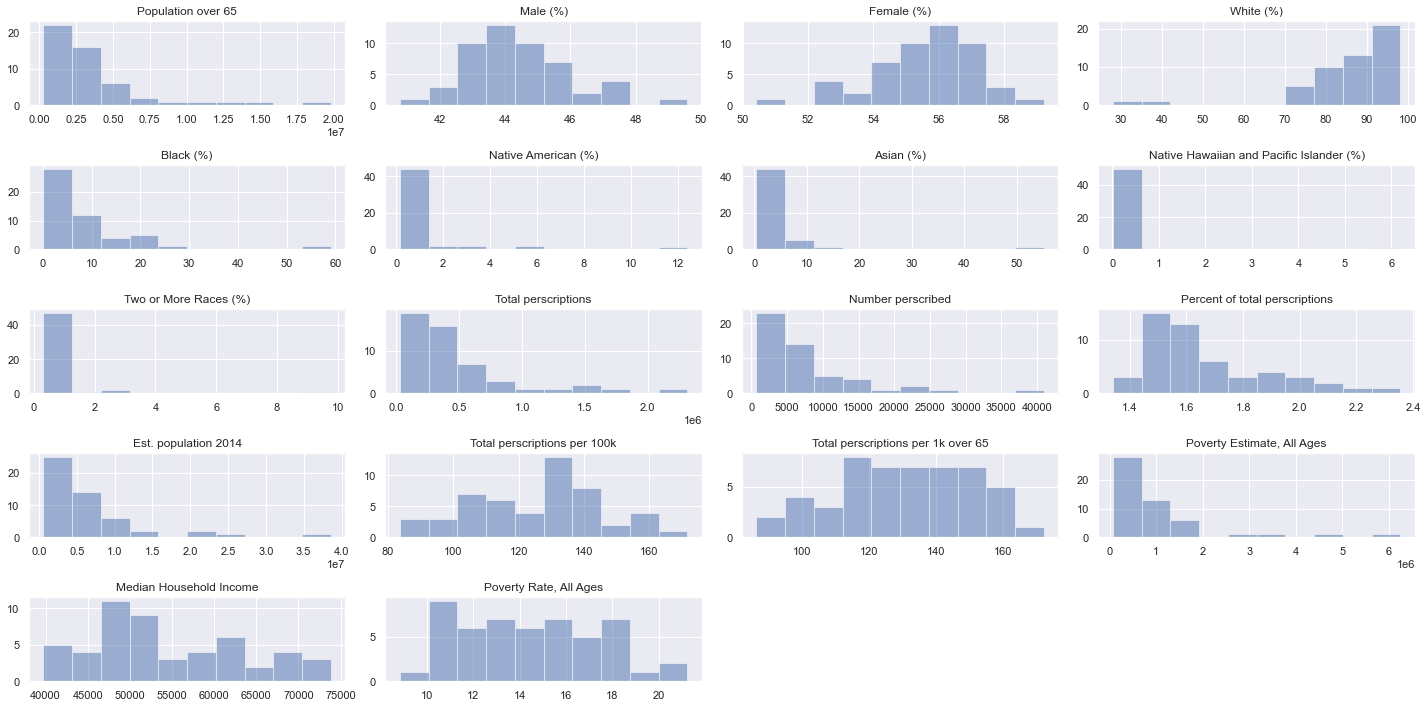

In [850]:
state_med_estpop_income_df.hist(alpha=0.5, figsize=(20, 10))
plt.tight_layout()
plt.show()

### Tangents

#### Bivariate chloropleth maps
This will move to a different notebook

#### Slices of the perscription pie...

In [509]:
query = """ SELECT * FROM (SELECT nppes_provider_state as state, 
                                                  generic_name as medication_perscribed,
                                                  COUNT(generic_name) as num_perscribed,
                                                   ROW_NUMBER() OVER (PARTITION BY nppes_provider_state 
                                                                                              ORDER BY COUNT(generic_name) DESC) as rank 
                                                   FROM bigquery-public-data.medicare.part_d_prescriber_2014
                                                   WHERE (nppes_provider_state != 'AA' AND 
                                                                    nppes_provider_state != 'AE' AND 
                                                                    nppes_provider_state != 'AS' AND
                                                                    nppes_provider_state != 'AP' AND
                                                                    nppes_provider_state != 'GU' AND
                                                                    nppes_provider_state != 'MP' AND
                                                                    nppes_provider_state != 'PR' AND
                                                                    nppes_provider_state != 'VI' AND
                                                                    nppes_provider_state != 'XX' AND
                                                                    nppes_provider_state != 'ZZ')
                                                   GROUP BY 1, 2
                                                   ORDER BY 1, 3 DESC) as ranks
                   WHERE rank < 11;
              """

In [518]:
query_job = client.query(query)
ten_most_common_perscriptions = query_job.to_dataframe()
print(len(ten_most_common_perscriptions))
ten_most_common_perscriptions.value_counts().head(20)

510


state  medication_perscribed        num_perscribed  rank
AK     AMLODIPINE BESYLATE          498             6       1
NV     LISINOPRIL                   1924            4       1
NY     OMEPRAZOLE                   18893           6       1
       METOPROLOL SUCCINATE         18739           7       1
       METFORMIN HCL                21926           2       1
       LISINOPRIL                   17847           8       1
       LEVOTHYROXINE SODIUM         24089           1       1
       GABAPENTIN                   16890           10      1
       ATORVASTATIN CALCIUM         18942           5       1
       AMLODIPINE BESYLATE          19225           4       1
       ALBUTEROL SULFATE            19354           3       1
NV     POTASSIUM CHLORIDE           2134            3       1
       OXYCODONE HCL/ACETAMINOPHEN  1691            10      1
       OMEPRAZOLE                   1750            7       1
       METFORMIN HCL                1912            5       1
       LEVOTH

In [519]:
ten_most_common_perscriptions[ten_most_common_perscriptions["state"] == "WV"]["num_perscribed"].sum()

23336

In [525]:
np.round((23336/205156)*100, 2)

11.37

#### Statistical analysis with scipy and pandas

In [898]:
state_med_estpop_income_df.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap("cool"), axis=1)

,Population over 65,Male (%),Female (%),White (%),Black (%),Native American (%),Asian (%),Native Hawaiian and Pacific Islander (%),Two or More Races (%),Total perscriptions,Number perscribed,Percent of total perscriptions,Est. population 2014,Total perscriptions per 100k,Total perscriptions per 1k over 65,"Poverty Estimate, All Ages",Median Household Income,"Poverty Rate, All Ages"
Population over 65,1.0,-0.27,0.27,-0.072,0.082,-0.19,0.091,-0.09,-0.089,0.99,0.98,-0.18,0.98,-0.21,-0.089,0.97,0.0038,0.2
Male (%),-0.27,1.0,-1.0,0.31,-0.6,0.57,0.051,0.11,0.15,-0.34,-0.31,0.57,-0.26,-0.13,-0.49,-0.24,-0.057,-0.19
Female (%),0.27,-1.0,1.0,-0.31,0.6,-0.57,-0.051,-0.11,-0.15,0.34,0.31,-0.57,0.26,0.13,0.49,0.24,0.057,0.19
White (%),-0.072,0.31,-0.31,1.0,-0.66,0.0044,-0.68,-0.63,-0.66,-0.061,-0.061,-0.068,-0.089,0.39,0.27,-0.1,-0.32,-0.16
Black (%),0.082,-0.6,0.6,-0.66,1.0,-0.21,-0.082,-0.12,-0.099,0.1,0.086,0.0056,0.085,-0.064,0.13,0.1,0.064,0.39
Native American (%),-0.19,0.57,-0.57,0.0044,-0.21,1.0,-0.021,-0.0068,0.16,-0.22,-0.2,0.5,-0.18,-0.2,-0.28,-0.16,0.088,-0.0087
Asian (%),0.091,0.051,-0.051,-0.68,-0.082,-0.021,1.0,0.96,0.94,0.061,0.074,-0.029,0.11,-0.44,-0.44,0.098,0.37,-0.19
Native Hawaiian and Pacific Islander (%),-0.09,0.11,-0.11,-0.63,-0.12,-0.0068,0.96,1.0,0.96,-0.11,-0.11,-0.025,-0.083,-0.34,-0.38,-0.083,0.27,-0.17
Two or More Races (%),-0.089,0.15,-0.15,-0.66,-0.099,0.16,0.94,0.96,1.0,-0.12,-0.1,0.07,-0.077,-0.34,-0.42,-0.071,0.26,-0.12
Total perscriptions,0.99,-0.34,0.34,-0.061,0.1,-0.22,0.061,-0.11,-0.12,1.0,0.99,-0.21,0.97,-0.13,0.018,0.96,-0.04,0.23


In [617]:
from scipy import stats

In [630]:
fig = px.scatter(x=state_med_pop_data.pop_over_65_2014, y=state_med_pop_data.total_num_med_perscribed)
fig.show()

In [631]:
fig = px.scatter(x=state_med_pop_data.est_pop_2014, y=state_med_pop_data.pop_over_65_2014)
fig.show()

In [624]:
#  returns correlation, p-value
# r=1 implies a strong, positive relationship
# r=0 implies no correlation
# r=-1 implies strong, negative relationship

r, p_value = stats.pearsonr(state_med_pop_data.total_num_med_perscribed, state_med_pop_data.pop_over_65_2014)
print(np.round(r, 4))
print(np.round(p_value, 41))

0.9879
3.0000000000000004e-41


From this we can for sure say that Fig.1 implied a correlation between population and total number of perscriptions!

In [633]:
r, p_value = stats.pearsonr(state_med_pop_data.est_pop_2014, state_med_pop_data.pop_over_65_2014)
print(np.round(r, 4))
print(np.round(p_value, 36))

0.98
5.000000000000001e-36
